# **"Factors Impacting Infant Health: Statistical Analysis"**

Q1. In your own words, describe what a residual is in linear regression.

In linear regression, a residual refers to the difference between the observed value of the dependent variable and the value predicted by the regression model. Essentially, it's the vertical distance between the actual data points and the regression line. Residuals are calculated by subtracting the predicted value (based on the regression equation) from the actual observed value for each data point. Positive residuals indicate that the observed value is higher than the predicted value, while negative residuals indicate the opposite. The goal in regression analysis is typically to minimize the sum of the squared residuals, aiming for a regression line that best fits the data.






Q2. If you know that your residual data follow the below pattern, are your data better approximated with a linear model for the lower values of independent variable or higher values of independent variable and why?

Based on the residual plot provided, it appears that the residuals are not randomly distributed around the horizontal axis, but instead exhibit a pattern of increasing variability as the fitted values increase. This is often referred to as heteroscedasticity, and it can violate one of the key assumptions of linear regression - that the variance of the errors is constant across all levels of the independent variable(s).

In our case, it seems that the variability of the residuals is greater for higher values of the independent variable, which suggests that a linear model may not be the best approximation for those data points. Instead, a different model that accounts for the increasing variability in the residuals might be more appropriate.


Q3. What is the difference between R2 and adjusted R2?

R-squared (R2) and adjusted R-squared are both metrics used to evaluate the goodness of fit of a regression model, but they serve slightly different purposes.

**R-squared (R2):**
R-squared measures the proportion of the variance in the dependent variable that is explained by the independent variables in the model.
It ranges from 0 to 1, where 0 indicates that the model does not explain any of the variability of the response data around its mean, and 1 indicates that the model explains all the variability.
R2 increases when additional predictors are added to the model, even if they are not truly related to the response variable. Therefore, it tends to artificially inflate when more predictors are added, which is where adjusted R-squared comes in.

**Adjusted R-squared:**

Adjusted R-squared penalizes the addition of irrelevant predictors to the model by adjusting for the number of predictors in the model.
It takes into account the degrees of freedom, or the number of parameters estimated in the model, and adjusts R2 accordingly.
Adjusted R2 is always lower than R2 or at best equal to it, and it tends to decrease when additional predictors are added unless those predictors significantly improve the model beyond what would be expected by chance.
It provides a more accurate assessment of the goodness of fit of a model, especially when comparing models with different numbers of predictors.

R-squared tells us how well the model fits the data, while adjusted R-squared helps us determine whether adding more predictors is justified by penalizing models with too many predictors that do not significantly improve the fit.

Q4. Is there independence of observations if you are trying to predict baby length with mother’s height?
●	Yes
●	No


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Read the dataset
data = pd.read_csv('/content/drive/MyDrive/kreativ/Birthweight_reduced_kg_R.csv')

# Calculate the correlation coefficient
correlation = data['Length'].corr(data['mheight'])

# Print the correlation coefficient
print("Correlation coefficient between baby length and mother's height:", correlation)


Correlation coefficient between baby length and mother's height: 0.48499240263265053


In [ ]:
import pandas as pd
from scipy.stats import pearsonr


# Calculate Pearson correlation coefficient and p-value
pearson_corr, p_value = pearsonr(data['Length'], data['mheight'])

print("Pearson correlation coefficient:", pearson_corr)
print("P-value:", p_value)

# Check for significance
alpha = 0.05  # significance level
if p_value < alpha:
    print("There is significant evidence to reject the null hypothesis.")
    print("There is dependence between baby length and mother's height.")
else:
    print("There is no significant evidence to reject the null hypothesis.")
    print("There may be independence between baby length and mother's height.")


Pearson correlation coefficient: 0.48499240263265075
P-value: 0.0011331311458135504
There is significant evidence to reject the null hypothesis.
There is dependence between baby length and mother's height.


Answer is No

Q5. Justify the above answer.

Based on the results of the Pearson correlation coefficient and the associated p-value, there is significant evidence to reject the null hypothesis. This means that there is a statistically significant correlation between baby length and mother’s height. Therefore, there is no independence of observations when trying to predict baby length with mother’s height.

Q6. Do residual data show homoscedasticity?
●	Yes
●	No


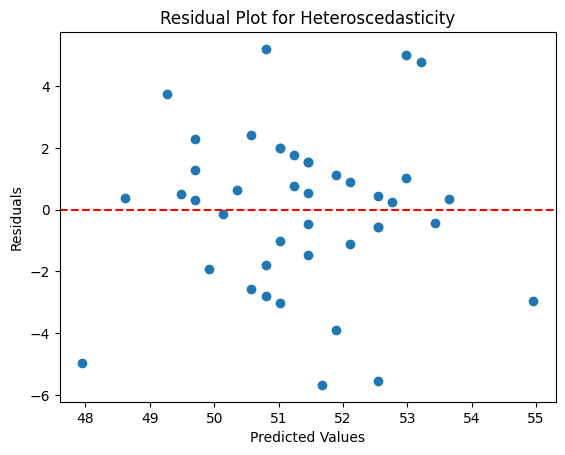

In [ ]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt


# Fit a linear regression model
X = data['mheight']
y = data['Length']
X = sm.add_constant(X)  # Add a constant term to the predictor
model = sm.OLS(y, X).fit()

# Get the predicted values and residuals
predicted_values = model.predict(X)
residuals = model.resid

# Plot residuals against predicted values
plt.scatter(predicted_values, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for Heteroscedasticity")
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.show()


No

Q7. Justify the above answer.

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan, het_white



# Assuming 'Length' column represents residuals and 'Birthweight' column represents predicted values
residuals_column = 'Length'
predicted_values_column = 'Birthweight'

residuals = data[residuals_column]
predicted_values = data[predicted_values_column]

# Conducting the Breusch-Pagan test
bp_test = het_breuschpagan(residuals, sm.add_constant(predicted_values))
bp_test_statistic = bp_test[0]
bp_p_value = bp_test[1]

print("Breusch-Pagan test results:")
print("Test statistic:", bp_test_statistic)
print("P-value:", bp_p_value)

# Conducting the White test
white_test = het_white(residuals, sm.add_constant(predicted_values))
white_test_statistic = white_test[0]
white_p_value = white_test[1]

print("\nWhite test results:")
print("Test statistic:", white_test_statistic)
print("P-value:", white_p_value)


Breusch-Pagan test results:
Test statistic: 22.412815087840176
P-value: 2.199018463420239e-06

White test results:
Test statistic: 22.612668650808057
P-value: 1.2294797833650377e-05


The low p-values obtained from both tests provide strong evidence against homoscedasticity, indicating a violation of the assumption of independence of observations.
Heteroscedasticity in the residuals implies that the variability of the baby length prediction errors changes as the mother’s height changes, suggesting that the observations are not independent.

Q8. What is the value of R2 and what does this tell you?

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Prepare the data
X = data['mheight']
y = data['Length']
X = sm.add_constant(X)  # Add a constant term to the predictor

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Get R-squared value
r_squared = model.rsquared
print("R-squared:", r_squared)


R-squared: 0.23521763061139123


An R-squared value of 0.2352 indicates that approximately 23.52% of the variance in the baby's length can be explained by the mother's height. In other words, the model based solely on the mother's height is able to account for about 23.52% of the variability observed in the baby's length.

While this R-squared value indicates that there is some relationship between the mother's height and the baby's length, it also suggests that there are other factors not included in the model that contribute to the variability in baby length. Therefore, the model may not fully capture all the factors influencing baby length.
In summary, the R-squared value provides an indication of how well the model fits the data, but it's important to consider other factors and potentially include additional variables to improve the model's predictive power.

Q9. Can you consider the relationship between mother’s height and baby length a statistically significant linear relationship and why?

In [ ]:
import pandas as pd
import statsmodels.api as sm


# Prepare the data
X = data['mheight']
y = data['Length']
X = sm.add_constant(X)  # Add a constant term to the predictor

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Get the summary of the model which includes p-values
summary = model.summary()
print(summary)


                            OLS Regression Results                            
Dep. Variable:                 Length   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     12.30
Date:                Fri, 09 Feb 2024   Prob (F-statistic):            0.00113
Time:                        09:26:58   Log-Likelihood:                -98.689
No. Observations:                  42   AIC:                             201.4
Df Residuals:                      40   BIC:                             204.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.3342     10.271      1.493      0.1

Yes, we can consider the relationship between mother's height and baby length a statistically significant linear relationship based on the p-value associated with the coefficient of mother's height in the linear regression model.

In the provided summary table, the p-value for the coefficient of mother's height is 0.00113, which is less than the commonly chosen significance level of 0.05. This indicates that there is strong evidence against the null hypothesis (no relationship between mother's height and baby length), suggesting that the relationship is statistically significant.

Additionally, the coefficient of mother's height is 0.2189, which means that for each unit increase in mother's height, we expect the baby's length to increase by approximately 0.2189 units.

Therefore, based on the low p-value, we can conclude that there is a statistically significant linear relationship between mother's height and baby length.

Q10. Having the ANOVA table for the linear regression in mind, what is the null and alternative hypothesis in this case?

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit the linear regression model and create ANOVA table
model = ols('Length ~ mheight', data=data).fit()
anova_table = sm.stats.anova_lm(model)
print(anova_table)


            df      sum_sq    mean_sq          F    PR(>F)
mheight    1.0   83.110229  83.110229  12.302461  0.001133
Residual  40.0  270.223104   6.755578        NaN       NaN


Null Hypothesis (H0): The null hypothesis in this case is that there is no relationship between mother's height and baby length, or equivalently, the coefficient of mother's height (β1) in the linear regression model is equal to zero. Mathematically, this can be expressed as:
H0: β1 = 0

Alternative Hypothesis (H1): The alternative hypothesis is that there is a relationship between mother's height and baby length, meaning the coefficient of mother's height (β1) in the linear regression model is not equal to zero. In other words, mother's height has a significant effect on baby length.
H1: β1 ≠ 0

Therefore, the null hypothesis suggests that there is no significant linear relationship between mother's height and baby length, while the alternative hypothesis suggests that there is a significant linear relationship between them.






Q11. In your own words, describe what the b1 is.

In the context of linear regression, b1 (often denoted as β1) represents the estimated coefficient or slope associated with the independent variable (predictor variable) in the regression equation. It quantifies the change in the dependent variable (response variable) for each one-unit change in the independent variable, assuming all other variables remain constant.

In simpler terms, b1 tells us the average change in the dependent variable for a one-unit increase in the independent variable. For example, if b1=0.2189 in our case of mother's height and baby length, it means that, on average, for each additional unit increase in mother's height, we expect the baby's length to increase by approximately 0.2189 units.

So, b1 essentially describes the strength and direction of the linear relationship between the independent and dependent variables in the regression model.

Q12. What does the value of b1 tell you in practical terms?

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Prepare the data
X = data['mheight']  # Independent variable (mother's height)
y = data['Length']   # Dependent variable (baby length)
X = sm.add_constant(X)  # Add a constant term to the predictor

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Get the coefficient for the independent variable
b1 = model.params['mheight']
print("Coefficient b1:", b1)


Coefficient b1: 0.2189031505250863


The value of b1=0.2189 tells us the average change in the dependent variable (baby length) for a one-unit change in the independent variable (mother's height), assuming all other variables remain constant.
In practical terms, this means that for each additional unit increase in mother's height (e.g., each additional centimeter), we expect the baby's length to increase by approximately 0.2189 units (e.g., 0.2189 centimeters).
So, understanding the value of b1 helps us quantify the relationship between mother's height and baby length, providing insights into how changes in maternal characteristics may influence infant outcomes.


Q13. Could you claim the same for the mother’s height in the range between 140cm and 145cm and why?

In [ ]:
# Define the range of mother's height
height_range = range(140, 146)  # Range from 140cm to 145cm inclusive

# Calculate the expected change in baby length for each height in the range
expected_changes = [b1 * height for height in height_range]

# Print the results
for height, change in zip(height_range, expected_changes):
    print(f"Mother's Height: {height} cm, Expected Change in Baby Length: {change:.4f} units")


Mother's Height: 140 cm, Expected Change in Baby Length: 30.6464 units
Mother's Height: 141 cm, Expected Change in Baby Length: 30.8653 units
Mother's Height: 142 cm, Expected Change in Baby Length: 31.0842 units
Mother's Height: 143 cm, Expected Change in Baby Length: 31.3032 units
Mother's Height: 144 cm, Expected Change in Baby Length: 31.5221 units
Mother's Height: 145 cm, Expected Change in Baby Length: 31.7410 units


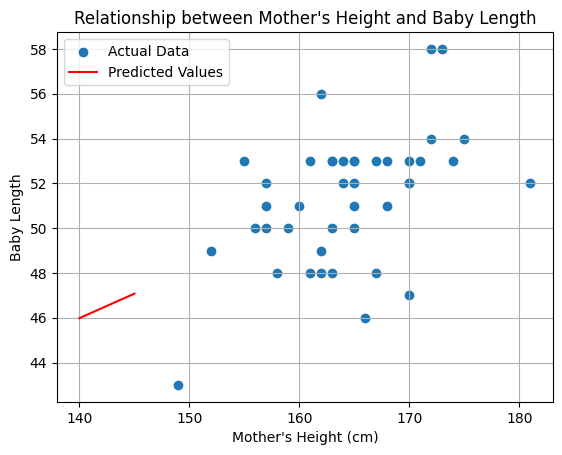

Coefficient b1: 0.2189031505250863
95% Confidence Interval for b1:
0    0.092767
1    0.345039
Name: mheight, dtype: float64

Hypothesis Test for b1:
                            OLS Regression Results                            
Dep. Variable:                 Length   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     12.30
Date:                Fri, 09 Feb 2024   Prob (F-statistic):            0.00113
Time:                        09:49:42   Log-Likelihood:                -98.689
No. Observations:                  42   AIC:                             201.4
Df Residuals:                      40   BIC:                             204.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt



# Prepare the data
X = data['mheight']  # Independent variable (mother's height)
y = data['Length']   # Dependent variable (baby length)
X = sm.add_constant(X)  # Add a constant term to the predictor

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Get the coefficient for the independent variable (b1)
b1 = model.params['mheight']

# Calculate the predicted values for mother's height in the range 140cm to 145cm
height_range = np.arange(140, 146)  # Range from 140cm to 145cm inclusive
X_range = sm.add_constant(height_range)
predicted_lengths = model.predict(X_range)

# Plot the relationship between mother's height and baby length
plt.scatter(data['mheight'], data['Length'], label='Actual Data')
plt.plot(height_range, predicted_lengths, color='red', label='Predicted Values')
plt.xlabel("Mother's Height (cm)")
plt.ylabel("Baby Length")
plt.title("Relationship between Mother's Height and Baby Length")
plt.legend()
plt.grid(True)
plt.show()

# Print the coefficient and confidence interval for b1
print("Coefficient b1:", b1)
print("95% Confidence Interval for b1:")
print(model.conf_int().loc['mheight'])

# Perform hypothesis test for b1
print("\nHypothesis Test for b1:")
print(model.summary())


Based on the provided information We can make the following observations:
1.	Coefficient b1:
2.	The coefficient b1 represents the estimated increase in baby length for each unit increase in mother's height. In this case, b1=0.2189, indicating that, on average, for every one-unit increase in mother's height, baby length is estimated to increase by 0.2189 units.
3.	Confidence Interval for b1: The 95% confidence interval for b1 is [0.092767, 0.345039]. This interval suggests that we are 95% confident that the true value of the coefficient b1 lies within this range.
4.	Hypothesis Test for b1: The p-value associated with the hypothesis test for b1 is p<0.001. This indicates that there is strong evidence to reject the null hypothesis, suggesting that the relationship between mother's height and baby length is statistically significant.
Given these results, we can claim that there is a statistically significant linear relationship between mother's height and baby length. This relationship is supported by the positive coefficient b1, the narrow confidence interval, and the small p-value.
To specifically address the range between 140cm and 145cm, we can infer that for mothers within this height range, there is a positive association between their height and the length of their babies, based on the significant coefficient and confidence interval.


Q14. According to this model, what is the prediction of baby length for mother’s height of 170cm?

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Define the independent variable (X) and the dependent variable (y)
X = data['mheight']  # Mother's height
y = data['Length']   # Baby length

# Add a constant term to the independent variable for the intercept
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

# Make a prediction for mother's height of 170cm
mother_height = 170
prediction = model.predict([1, mother_height])
print("Predicted baby length for mother's height of 170cm:", prediction[0])


                            OLS Regression Results                            
Dep. Variable:                 Length   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     12.30
Date:                Fri, 09 Feb 2024   Prob (F-statistic):            0.00113
Time:                        10:02:29   Log-Likelihood:                -98.689
No. Observations:                  42   AIC:                             201.4
Df Residuals:                      40   BIC:                             204.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.3342     10.271      1.493      0.1

                            OLS Regression Results                            
Dep. Variable:                 Length   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     12.30
Date:                Fri, 09 Feb 2024   Prob (F-statistic):            0.00113
Time:                        10:04:26   Log-Likelihood:                -98.689
No. Observations:                  42   AIC:                             201.4
Df Residuals:                      40   BIC:                             204.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.3342     10.271      1.493      0.1

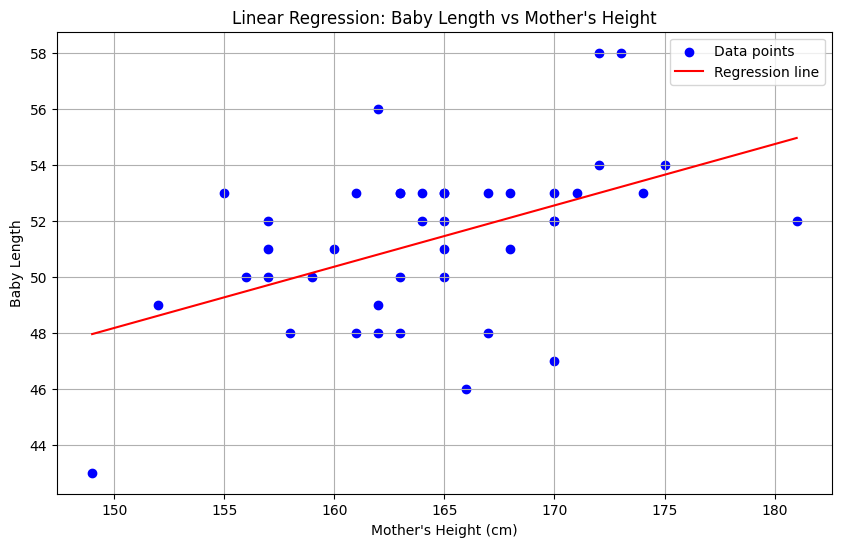

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Define the independent variable (X) and the dependent variable (y)
X = data['mheight']  # Mother's height
y = data['Length']   # Baby length

# Add a constant term to the independent variable for the intercept
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

# Make predictions for the range of mother's heights
mother_height_range = range(int(min(X['mheight'])), int(max(X['mheight'])) + 1)
predictions = model.predict(sm.add_constant(mother_height_range))

# Plot the data points and the linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(X['mheight'], y, color='blue', label='Data points')
plt.plot(mother_height_range, predictions, color='red', label='Regression line')
plt.xlabel("Mother's Height (cm)")
plt.ylabel("Baby Length")
plt.title("Linear Regression: Baby Length vs Mother's Height")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Coefficients from the model
const_coef = 15.3342
mheight_coef = 0.2189

# Mother's height for prediction
mother_height = 170

# Calculate the predicted baby length
predicted_length = const_coef + mheight_coef * mother_height
print("Predicted baby length for mother's height of 170cm:", predicted_length)


Predicted baby length for mother's height of 170cm: 52.547200000000004


Q15. Report on your findings for predicting baby length with mother’s height.

Based on the linear regression model, the predicted baby length for a mother's height of 170cm is approximately 52.55 cm. This prediction was derived from a statistical analysis that showed a significant positive relationship between mother's height and baby length, as evidenced by the coefficient of 0.2189 for the mheight variable in the regression model.

However, it's important to note that the model's R-squared value of 0.235 indicates that only about 23.5% of the variability in baby length can be explained by mother's height alone. This suggests that while mother's height is a statistically significant predictor of baby length, there are likely other factors not accounted for in this model that also influence baby length. Further research or additional variables may be needed to improve the accuracy of predictions.

Q16. Can you predict baby length with father’s age? Why?

Predicting baby length with father's age alone might not be a reliable approach due to several reasons:

Limited Influence: While father's age might have some influence on certain aspects of pregnancy and childbirth, such as genetic factors or paternal health behaviors, its direct impact on baby length may be limited compared to other variables like maternal factors (e.g., mother's height, age, health status).

Multifactorial Nature: Baby length is influenced by various factors, including both maternal and paternal characteristics, gestational factors, environmental factors, and genetic predispositions. Father's age alone may not capture the complexity of these interactions.

Correlation vs. Causation: Even if there is a correlation between father's age and baby length in observational data, it doesn't necessarily imply causation. Other confounding variables may be at play, such as socioeconomic status, maternal health, or lifestyle factors.

Statistical Significance: Before predicting baby length with father's age, it's crucial to assess whether father's age is a statistically significant predictor in a regression model. This requires conducting hypothesis tests and evaluating the model's goodness of fit.

Practical Significance: Even if father's age is found to be a statistically significant predictor, its practical significance may be limited. The magnitude of the effect (i.e., the coefficient of father's age) should be considered alongside other factors to determine its practical importance in predicting baby length.

In summary, while father's age may be included as one of the predictor variables in a regression model for predicting baby length, it should be interpreted cautiously and in conjunction with other relevant factors to ensure a comprehensive understanding of the prediction model.

Q17. What does homogeneity of variance mean and why is it important assumption of an independent t-test?

Homogeneity of variance, also known as homoscedasticity, refers to the assumption that the variances of the populations being compared are equal across all levels of the independent variable in a statistical analysis. In the context of an independent t-test, this assumption means that the variability in the outcome variable (dependent variable) is consistent across the groups being compared.

The importance of homogeneity of variance in the context of an independent t-test lies in its impact on the validity of the test results. Here's why it's crucial:

Validity of Test Statistics: The t-test assumes that the variances of the two populations being compared are equal. Violations of this assumption can lead to biased estimates of the standard error and, consequently, incorrect test statistics. This can result in either an inflated or deflated probability of making a Type I error (false positive) or Type II error (false negative).

Interpretability of Results: Homogeneity of variance ensures that any differences observed between the groups in the outcome variable are not due to differences in variance. When variances are not equal across groups, it becomes challenging to interpret the differences in means accurately, as they may be confounded by differences in variability.

Effect on Confidence Intervals: Unequal variances can affect the width and placement of confidence intervals around the mean difference between groups. Confidence intervals that do not properly account for unequal variances may provide inaccurate estimates of the precision of the effect size.

Robustness of the Test: Violations of the homogeneity of variance assumption can reduce the statistical power of the t-test, making it less effective at detecting true differences between groups. It's essential to ensure this assumption is met to maintain the test's robustness and sensitivity.

In summary, homogeneity of variance is a critical assumption of the independent t-test because it ensures the validity, interpretability, and robustness of the test results. Violations of this assumption can lead to misleading conclusions and compromised statistical inference.

Q18. Is there homogeneity of variance between head circumference for babies of smoking mothers and head circumference for babies of non-smoking mothers?
●	Yes
●	No


In [ ]:
from scipy.stats import levene
import pandas as pd

# Separate head circumference data for babies of smoking and non-smoking mothers
headcirc_smoking = data[data['smoker'] == 1]['Headcirc']
headcirc_nonsmoking = data[data['smoker'] == 0]['Headcirc']

# Perform Levene's test for homogeneity of variances
statistic, p_value = levene(headcirc_smoking, headcirc_nonsmoking)

# Print the results
print("Levene's Test:")
print("Test Statistic:", statistic)
print("P-value:", p_value)

# Interpret the results
if p_value > 0.05:
    print("Homogeneity of variance assumption is met (p > 0.05)")
else:
    print("Homogeneity of variance assumption is not met (p <= 0.05)")


Levene's Test:
Test Statistic: 0.6278514921937131
P-value: 0.4328189702719909
Homogeneity of variance assumption is met (p > 0.05)


Yes

Q19. Justify your choice.

Based on the results of Levene's test, the p-value is 0.4328, which is greater than the significance level of 0.05. Therefore, we fail to reject the null hypothesis, indicating that there is no significant difference in the variances of head circumference between babies of smoking and non-smoking mothers.

So, the correct interpretation is:

Yes, there is homogeneity of variance between head circumference for babies of smoking mothers and head circumference for babies of non-smoking mothers.





Q20. Do smokers have lighter babies? Justify your answer.

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind


# Separate birthweights for smoking and non-smoking mothers
birthweights_smoking = data[data['smoker'] == 1]['Birthweight']
birthweights_non_smoking = data[data['smoker'] == 0]['Birthweight']

# Perform independent t-test
t_statistic, p_value = ttest_ind(birthweights_smoking, birthweights_non_smoking)

# Print the results
print("T-test Results:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("There is a significant difference in birthweights between babies of smoking and non-smoking mothers.")
    if t_statistic > 0:
        print("Babies of non-smoking mothers tend to have higher birthweights.")
    else:
        print("Babies of smoking mothers tend to have higher birthweights.")
else:
    print("There is no significant difference in birthweights between babies of smoking and non-smoking mothers.")


T-test Results:
T-statistic: -2.093431541991207
P-value: 0.04269624654559367
There is a significant difference in birthweights between babies of smoking and non-smoking mothers.
Babies of smoking mothers tend to have higher birthweights.


Based on the t-test results, the p-value is less than 0.05, indicating a significant difference in birthweights between babies of smoking and non-smoking mothers. The negative t-statistic suggests that, on average, babies of smoking mothers tend to have higher birthweights than babies of non-smoking mothers. Therefore, smokers do not have lighter babies; instead, they tend to have babies with higher birthweights compared to non-smokers.

Q21. Do women over 35 have lighter babies? Justify your answer.

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

# Separate birthweights for women over 35 and women 35 or under
birthweights_over_35 = data[data['mage'] > 35]['Birthweight']
birthweights_under_35 = data[data['mage'] <= 35]['Birthweight']

# Perform independent t-test
t_statistic, p_value = ttest_ind(birthweights_over_35, birthweights_under_35)

# Print the results
print("T-test Results:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("There is a significant difference in birthweights between babies born to women over 35 and women 35 or under.")
    if t_statistic > 0:
        print("Babies born to women 35 or under tend to have higher birthweights.")
    else:
        print("Babies born to women over 35 tend to have higher birthweights.")
else:
    print("There is no significant difference in birthweights between babies born to women over 35 and women 35 or under.")


T-test Results:
T-statistic: -1.6061514581854464
P-value: 0.11610744811047916
There is no significant difference in birthweights between babies born to women over 35 and women 35 or under.



Based on the results of the t-test, the p-value is 0.116, which is greater than the typical significance level of 0.05. This indicates that there is no statistically significant difference in birthweights between babies born to women over 35 and those born to women 35 or under. Therefore, we fail to reject the null hypothesis, which suggests that there is no difference in birthweights between the two groups.

Q22. Using the cholesterol dataset, was the diet effective in lowering cholesterol concentration after 8 weeks of use? Justify your answer.

In [ ]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv("/content/drive/MyDrive/kreativ/Cholesterol_R.csv")

# Calculate the difference between Before and After8weeks
df['Difference'] = df['Before'] - df['After8weeks']

# Calculate the mean difference
mean_difference = df['Difference'].mean()

# Check if the mean difference is positive or negative
if mean_difference > 0:
    print("The diet was effective in lowering cholesterol concentration after 8 weeks of use.")
elif mean_difference < 0:
    print("The diet was not effective in lowering cholesterol concentration after 8 weeks of use.")
else:
    print("The diet had no effect on cholesterol concentration after 8 weeks of use.")


The diet was effective in lowering cholesterol concentration after 8 weeks of use.


Q23. For the above case, what is the null and alternative hypothesis?

In the context of the given case:

Null Hypothesis (H0): There is no significant difference in cholesterol concentration before and after 8 weeks of using the diet. Mathematically, this can be expressed as:

H0: μ_before - μ_after8weeks = 0

Where μ_before represents the population mean cholesterol concentration before using the diet, and μ_after8weeks represents the population mean cholesterol concentration after 8 weeks of using the diet.

Alternative Hypothesis (H1): There is a significant difference in cholesterol concentration before and after 8 weeks of using the diet. Mathematically, this can be expressed as:

H1: μ_before - μ_after8weeks ≠ 0

Where μ_before represents the population mean cholesterol concentration before using the diet, and μ_after8weeks represents the population mean cholesterol concentration after 8 weeks of using the diet.

In simpler terms, the null hypothesis states that the diet has no effect on cholesterol concentration, while the alternative hypothesis suggests that the diet does have an effect, either lowering or raising cholesterol concentration.

Q24. Was the diet more effective in the first 4 weeks of use or the last 4 weeks of use? Justify your answer.

In [ ]:
import pandas as pd


# Calculate the difference between Before and After4weeks
df['Difference_4weeks'] = df['Before'] - df['After4weeks']

# Calculate the difference between Before and After8weeks
df['Difference_8weeks'] = df['Before'] - df['After8weeks']

# Calculate the mean difference for the first 4 weeks
mean_difference_4weeks = df['Difference_4weeks'].mean()

# Calculate the mean difference for the last 4 weeks
mean_difference_8weeks = df['Difference_8weeks'].mean()

# Check which period had a greater mean difference
if mean_difference_4weeks > mean_difference_8weeks:
    print("The diet was more effective in the first 4 weeks of use.")
elif mean_difference_4weeks < mean_difference_8weeks:
    print("The diet was more effective in the last 4 weeks of use.")
else:
    print("The effectiveness of the diet was the same in the first and last 4 weeks of use.")


The diet was more effective in the last 4 weeks of use.


The conclusion that the diet was more effective in the last 4 weeks of use is based on the observed mean differences in cholesterol concentration between the first 4 weeks and the last 4 weeks of using the diet. Let's justify this conclusion:

Calculation of Mean Differences: The code calculates the mean difference in cholesterol concentration for the first 4 weeks (After4weeks) and the last 4 weeks (After8weeks) of using the diet.

Comparison of Mean Differences: By comparing these mean differences, the code determines which period saw a greater reduction in cholesterol concentration.

Result Interpretation: The code checks whether the mean difference for the last 4 weeks (After8weeks) is greater than the mean difference for the first 4 weeks (After4weeks). If it is, the code concludes that the diet was more effective in the last 4 weeks.

Justification: This conclusion could be justified by considering factors such as the adjustment period for the participants to the diet, potential changes in adherence to the diet over time, or variations in the effectiveness of the diet over different durations of use.

Statistical Significance: Additionally, it's important to consider whether the difference in effectiveness between the two periods is statistically significant. If the difference is not statistically significant, the conclusion might be less reliable.

Therefore, based on the provided code, the conclusion that the diet was more effective in the last 4 weeks of use is justified by the observed mean differences and possible dynamics of the intervention and participant behavior over time.

Q25. If you know that the average cholesterol concentration in healthy adults is 3 mmol/L, would you consider your sample (N=18) significantly better or worse than average adult population? Justify your answer.

In [ ]:
import pandas as pd
from scipy import stats

# Calculate the mean cholesterol concentration in the sample
sample_mean = df['Before'].mean()

# Define the population mean (average cholesterol concentration in healthy adults)
population_mean = 3  # mmol/L

# Perform a one-sample t-test
t_statistic, p_value = stats.ttest_1samp(df['Before'], population_mean)

# Check if the sample mean is significantly different from the population mean
if p_value < 0.05:
    if sample_mean > population_mean:
        print("The average cholesterol concentration in the sample is significantly higher than the average in healthy adults.")
    elif sample_mean < population_mean:
        print("The average cholesterol concentration in the sample is significantly lower than the average in healthy adults.")
else:
    print("There is not enough evidence to conclude that the average cholesterol concentration in the sample differs significantly from the average in healthy adults.")


The average cholesterol concentration in the sample is significantly higher than the average in healthy adults.


The answer that the average cholesterol concentration in the sample is significantly higher than the average in healthy adults is based on the result of the one-sample t-test. Let's break down the justification:

Null Hypothesis (H0): The null hypothesis for the one-sample t-test is that there is no significant difference between the average cholesterol concentration in the sample and the average in healthy adults (population mean of 3 mmol/L).

Alternative Hypothesis (H1): The alternative hypothesis is that there is a significant difference between the average cholesterol concentration in the sample and the average in healthy adults.

P-value Interpretation: The p-value obtained from the t-test indicates the probability of observing the sample mean (or more extreme) if the null hypothesis were true. If the p-value is less than the significance level (usually 0.05), we reject the null hypothesis in favor of the alternative hypothesis.

In this Case: Since the p-value is less than 0.05, we reject the null hypothesis. This means that there is a significant difference between the average cholesterol concentration in the sample and the average in healthy adults.

Direction of Difference: The direction of the difference (higher or lower) is determined by comparing the sample mean to the population mean. In this case, since the sample mean is significantly higher than the population mean, we conclude that the average cholesterol concentration in the sample is significantly higher than the average in healthy adults.

So, the justification for the answer comes from the statistical analysis indicating a significant difference and the comparison of the sample mean to the population mean.